# Review: Types of Machine Learning

1. Supervised: a special column is considered the label (want to predict it based on the others)
 - regression (numeric)
 - classification (categorical)
2. Unsupervised: no labels, just looking for patterns (e.g., covariance)
3. Reinforcement (not in 320)

### Examples of Linear Algebra in Machine Learning

* Linear Regression (supervised learning, regression)
* Principal Component Analysis (unsupervised learning)

# Today

* Regression vs. Classification
* Logistic Regression (ironically, a classification model, not a regression model)
* Evaluating whether a model is good

### Regression vs. Classification

Typical ML steps:
1. train model
2. test model (evaluate: is it good?)
3. make new predictions

We'll start with step 3.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("df.csv")
df.head()

,x1,x2,x3,one,y,z
0,8.973478,2.207377,9.061502,1,12.848586,True
1,8.356966,5.851814,1.047791,1,32.750062,True
2,3.702320,3.078078,7.416740,1,2.742693,False
3,8.535779,2.445276,5.936232,1,18.801234,True
4,9.286952,1.654095,3.647136,1,26.139734,True


In [3]:
def get_row(i):
    return df.loc[i, "x1":"one"].values.reshape(1,-1).astype(float)
get_row(1)

array([[8.35696565, 5.85181397, 1.04779146, 1.        ]])

In [4]:
vec1 = np.array([[ 3.014627  ],
                 [ 1.01683636],
                 [-2.0016033 ],
                 [ 3.90338599]])

# predict y column
def regression_model(row):
    return row @ vec1
regression_model(get_row(2))

array([[3.34902949]])

In [5]:
vec2 = np.array([[ 1.37239431],
                 [-1.16675093],
                 [-1.32467119],
                 [ 6.59925245]])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def classification_model(row):
    return sigmoid(row @ vec2).round().astype(bool)

classification_model(get_row(1))

array([[ True]])

In [6]:
df["predicted_z"] = classification_model(df.loc[:, "x1":"one"])
df.head()

,x1,x2,x3,one,y,z,predicted_z
0,8.973478,2.207377,9.061502,1,12.848586,True,True
1,8.356966,5.851814,1.047791,1,32.750062,True,True
2,3.702320,3.078078,7.416740,1,2.742693,False,False
3,8.535779,2.445276,5.936232,1,18.801234,True,True
4,9.286952,1.654095,3.647136,1,26.139734,True,True


In [7]:
(df["z"] == df["predicted_z"]).value_counts()

True     95
False     5
dtype: int64

# Logistic Sigmoid Function

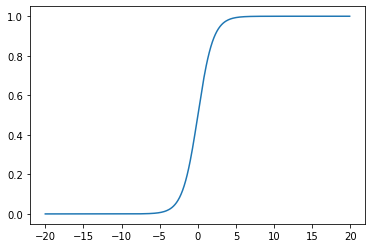

In [8]:
x = np.arange(-20, 20, 0.1)
plt.plot(x, sigmoid(x))